# 10分でpandas入門

- [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)（オリジナル）
- [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

In [1]:
import pandas as pd  # pandasの読み込み
import numpy as np  # numpyの読み込み
import matplotlib.pyplot as plt  #  matplotlibの読み込み
%matplotlib inline

## オブジェクト生成

- pandasにおける主要なデータ構造は以下の３つ
    - Seires (1次元)
    - DataFrame (2次元)
    - Panel (3次元)
- [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

### Series

値が入ったリストを渡すことでSeriesオブジェクトを作成。

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

pd.date_range()という関数を使ってSeriesオブジェクトを作成。

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame

２次元配列を渡すことで、DataFrameオブジェクトを生成

In [6]:
rng = np.random.RandomState(42)

In [7]:
# Original
#df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
# Modified
df = pd.DataFrame(rng.randint(-5, 6, 24).reshape(6, 4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4
2013-01-06,2,0,-4,-1


辞書を渡すことで、DataFrameオブジェクトを生成

In [9]:
range(4)

[0, 1, 2, 3]

In [10]:
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                   'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(['test', 'train', 'test', 'train']),
                   'F': 'foo'
                   })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

データフレームが持っているメソッドを調べる

In [13]:
#df2.<TAB>

## データを眺める

- [Essential Basic Functionality](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

In [14]:
df.head()

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4
2013-01-06,2,0,-4,-1


In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [18]:
df.values

array([[ 1, -2,  5,  2],
       [-1,  1,  4, -3],
       [ 1,  5,  5,  2],
       [-1, -2,  2,  2],
       [-3,  0, -1, -4],
       [ 2,  0, -4, -1]])

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.166667,0.333333,1.833333,-0.333333
std,1.834848,2.581989,3.656045,2.732520
min,-3.000000,-2.000000,-4.000000,-4.000000
25%,-1.000000,-1.500000,-0.250000,-2.500000
50%,0.000000,0.000000,3.000000,0.500000
75%,1.000000,0.750000,4.750000,2.000000
max,2.000000,5.000000,5.000000,2.000000


In [20]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1,-1,1,-1,-3,2
B,-2,1,5,-2,0,0
C,5,4,5,2,-1,-4
D,2,-3,2,2,-4,-1


In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,2,5,-2,1
2013-01-02,-3,4,1,-1
2013-01-03,2,5,5,1
2013-01-04,2,2,-2,-1
2013-01-05,-4,-1,0,-3
2013-01-06,-1,-4,0,2


In [22]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4
2013-01-06,2,0,-4,-1
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2


## 選択

- [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)
- [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### 取得

In [23]:
df['A']

2013-01-01    1
2013-01-02   -1
2013-01-03    1
2013-01-04   -1
2013-01-05   -3
2013-01-06    2
Freq: D, Name: A, dtype: int64

In [24]:
df.A

2013-01-01    1
2013-01-02   -1
2013-01-03    1
2013-01-04   -1
2013-01-05   -3
2013-01-06    2
Freq: D, Name: A, dtype: int64

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2


In [26]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2
2013-01-04,-1,-2,2,2


### ラベルによる選択

- [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)
- ix: 名前と番号と真偽値リストのごちゃまぜ
- iloc: 番号 or 真偽値リスト
- loc: 名前 or 真偽値リスト

In [27]:
dates[0]

Timestamp('2013-01-01 00:00:00', offset='D')

In [28]:
df.loc[dates[0]]

A    1
B   -2
C    5
D    2
Name: 2013-01-01 00:00:00, dtype: int64

In [29]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1,-2
2013-01-02,-1,1
2013-01-03,1,5
2013-01-04,-1,-2
2013-01-05,-3,0
2013-01-06,2,0


In [30]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1,1
2013-01-03,1,5
2013-01-04,-1,-2


In [31]:
df.loc['20130102', ['A', 'B']]

A   -1
B    1
Name: 2013-01-02 00:00:00, dtype: int64

In [32]:
df.loc[dates[0], 'A']

1

In [33]:
# 少しだけ速い
df.at[dates[0], 'A']

1

### 位置による選択

- [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

In [34]:
df.iloc[3]

A   -1
B   -2
C    2
D    2
Name: 2013-01-04 00:00:00, dtype: int64

In [35]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1,-2
2013-01-05,-3,0


In [36]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1,4
2013-01-03,1,5
2013-01-05,-3,-1


In [37]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2


In [38]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-2,5
2013-01-02,1,4
2013-01-03,5,5
2013-01-04,-2,2
2013-01-05,0,-1
2013-01-06,0,-4


In [39]:
df.iloc[1, 1]

1

In [40]:
# 少しだけ速い
df.iat[1, 1]

1

### ブーリアンインデックス

In [41]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-03,1,5,5,2
2013-01-06,2,0,-4,-1


In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,1.0,NaN,5.0,2.0
2013-01-02,NaN,1.0,4.0,NaN
2013-01-03,1.0,5.0,5.0,2.0
2013-01-04,NaN,NaN,2.0,2.0
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,2.0,NaN,NaN,NaN


In [43]:
df.where(df > 0)

,A,B,C,D
2013-01-01,1.0,NaN,5.0,2.0
2013-01-02,NaN,1.0,4.0,NaN
2013-01-03,1.0,5.0,5.0,2.0
2013-01-04,NaN,NaN,2.0,2.0
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,2.0,NaN,NaN,NaN


In [44]:
df.mask(df > 0)

,A,B,C,D
2013-01-01,NaN,-2.0,NaN,NaN
2013-01-02,-1.0,NaN,NaN,-3.0
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,-1.0,-2.0,NaN,NaN
2013-01-05,-3.0,0.0,-1.0,-4.0
2013-01-06,NaN,0.0,-4.0,-1.0


In [45]:
df2 = df.copy()

In [46]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [47]:
df2

,A,B,C,D,E
2013-01-01,1,-2,5,2,one
2013-01-02,-1,1,4,-3,one
2013-01-03,1,5,5,2,two
2013-01-04,-1,-2,2,2,three
2013-01-05,-3,0,-1,-4,four
2013-01-06,2,0,-4,-1,three


In [48]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1,5,5,2,two
2013-01-05,-3,0,-1,-4,four


### 代入

新しいカラムを自動で追加すると、インデックスでそろう。

In [49]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [50]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [51]:
df['F'] = s1

In [52]:
df

,A,B,C,D,F
2013-01-01,1,-2,5,2,NaN
2013-01-02,-1,1,4,-3,1.0
2013-01-03,1,5,5,2,2.0
2013-01-04,-1,-2,2,2,3.0
2013-01-05,-3,0,-1,-4,4.0
2013-01-06,2,0,-4,-1,5.0


ラベルで代入

In [53]:
df.at[dates[0], 'A'] = 0

In [54]:
df

,A,B,C,D,F
2013-01-01,0,-2,5,2,NaN
2013-01-02,-1,1,4,-3,1.0
2013-01-03,1,5,5,2,2.0
2013-01-04,-1,-2,2,2,3.0
2013-01-05,-3,0,-1,-4,4.0
2013-01-06,2,0,-4,-1,5.0


ポジションで代入

In [55]:
df.iat[0, 1] = 0

In [56]:
df

,A,B,C,D,F
2013-01-01,0,0,5,2,NaN
2013-01-02,-1,1,4,-3,1.0
2013-01-03,1,5,5,2,2.0
2013-01-04,-1,-2,2,2,3.0
2013-01-05,-3,0,-1,-4,4.0
2013-01-06,2,0,-4,-1,5.0


In [57]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [58]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [59]:
df2 = df.copy()

In [60]:
df2

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [61]:
df2[df2 > 0] = - df2

In [62]:
df2

,A,B,C,D,F
2013-01-01,0,0,-5,-5,NaN
2013-01-02,-1,-1,-4,-5,-1.0
2013-01-03,-1,-5,-5,-5,-2.0
2013-01-04,-1,-2,-2,-5,-3.0
2013-01-05,-3,0,-1,-5,-4.0
2013-01-06,-2,0,-4,-5,-5.0


## 欠損値の扱い

- pandasは`np.nan`欠損値を表す。計算するときは基本的に無視される。
- 詳細：[Working with missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

In [63]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [64]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [65]:
df1

,A,B,C,D,F,E
2013-01-01,0,0,5,5,NaN,NaN
2013-01-02,-1,1,4,5,1.0,NaN
2013-01-03,1,5,5,5,2.0,NaN
2013-01-04,-1,-2,2,5,3.0,NaN


In [66]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [67]:
df1

,A,B,C,D,F,E
2013-01-01,0,0,5,5,NaN,1.0
2013-01-02,-1,1,4,5,1.0,1.0
2013-01-03,1,5,5,5,2.0,NaN
2013-01-04,-1,-2,2,5,3.0,NaN


In [68]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1,1,4,5,1.0,1.0


In [69]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0,0,5,5,5.0,1.0
2013-01-02,-1,1,4,5,1.0,1.0
2013-01-03,1,5,5,5,2.0,5.0
2013-01-04,-1,-2,2,5,3.0,5.0


In [70]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

- 詳細：[Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### 統計情報

- 通常、欠損値は抜いて計算される

In [71]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [72]:
df.mean()

A   -0.333333
B    0.666667
C    1.833333
D    5.000000
F    3.000000
dtype: float64

In [73]:
df.mean(axis=1)

2013-01-01    2.5
2013-01-02    2.0
2013-01-03    3.6
2013-01-04    1.4
2013-01-05    1.0
2013-01-06    1.6
Freq: D, dtype: float64

In [74]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [75]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [76]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.0,4.0,4.0,4.0,1.0
2013-01-04,-4.0,-5.0,-1.0,2.0,0.0
2013-01-05,-8.0,-5.0,-6.0,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [77]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [78]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,9,10,1.0
2013-01-03,0,6,14,15,3.0
2013-01-04,-1,4,16,20,6.0
2013-01-05,-4,4,15,25,10.0
2013-01-06,-2,4,11,30,15.0


In [79]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [80]:
df.apply(lambda x: x.max() - x.min())

A    5.0
B    7.0
C    9.0
D    0.0
F    4.0
dtype: float64

### ヒストグラム化

- [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [81]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [82]:
s

0    6
1    0
2    3
3    4
4    3
5    2
6    5
7    6
8    2
9    1
dtype: int64

In [83]:
s.value_counts()

6    2
3    2
2    2
5    1
4    1
1    1
0    1
dtype: int64

### 文字列メソッド

- 文字列のパターンマッチングをしたい場合は、[正規表現](https://docs.python.org/2/library/re.html)を使える

In [84]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [85]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

- [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

In [86]:
df = pd.DataFrame(np.random.randn(10, 4))

In [87]:
df

,0,1,2,3
0,-0.219999,0.126186,-1.027818,-0.060541
1,-0.469497,0.877346,0.798142,0.422217
2,0.288134,-0.219931,0.996565,0.858624
3,-1.379575,-1.494088,-0.587543,-1.572326
4,0.725799,-0.368516,-1.441205,0.737331
5,1.309296,-1.296736,-0.101533,0.611342
6,-1.479247,-0.338679,-0.884148,-2.563156
7,-1.149549,1.471375,0.393910,-1.486131
8,1.791959,-0.500996,0.102585,0.517408
9,0.873981,0.155327,0.322923,0.742469


In [88]:
pieces = [df[:3], df[3:7], df[7:]]

In [89]:
pieces

[          0         1         2         3
 0 -0.219999  0.126186 -1.027818 -0.060541
 1 -0.469497  0.877346  0.798142  0.422217
 2  0.288134 -0.219931  0.996565  0.858624,
           0         1         2         3
 3 -1.379575 -1.494088 -0.587543 -1.572326
 4  0.725799 -0.368516 -1.441205  0.737331
 5  1.309296 -1.296736 -0.101533  0.611342
 6 -1.479247 -0.338679 -0.884148 -2.563156,
           0         1         2         3
 7 -1.149549  1.471375  0.393910 -1.486131
 8  1.791959 -0.500996  0.102585  0.517408
 9  0.873981  0.155327  0.322923  0.742469]

In [90]:
pd.concat(pieces)

,0,1,2,3
0,-0.219999,0.126186,-1.027818,-0.060541
1,-0.469497,0.877346,0.798142,0.422217
2,0.288134,-0.219931,0.996565,0.858624
3,-1.379575,-1.494088,-0.587543,-1.572326
4,0.725799,-0.368516,-1.441205,0.737331
5,1.309296,-1.296736,-0.101533,0.611342
6,-1.479247,-0.338679,-0.884148,-2.563156
7,-1.149549,1.471375,0.393910,-1.486131
8,1.791959,-0.500996,0.102585,0.517408
9,0.873981,0.155327,0.322923,0.742469


### Join

- SQLスタイルのマージ。
- [Database style joining](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [91]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [92]:
left

,key,lval
0,foo,1
1,foo,2


In [93]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [94]:
right

,key,rval
0,foo,4
1,foo,5


In [95]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

- [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [96]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [97]:
df

,A,B,C,D
0,-0.357499,0.137762,-0.288825,0.510515
1,-1.289174,1.296952,-1.225317,-0.669395
2,0.162652,1.479769,-2.379245,0.560935
3,1.768058,-1.197707,0.596559,-0.279655
4,-0.032104,-1.317490,-0.424714,-1.550373
5,-2.236139,-0.742265,0.571152,0.674773
6,0.393245,0.349261,-0.105546,0.586030
7,0.288275,-0.620930,-0.033776,0.791309


In [98]:
s = df.iloc[3]

In [99]:
s

A    1.768058
B   -1.197707
C    0.596559
D   -0.279655
Name: 3, dtype: float64

In [100]:
df.append(s)

,A,B,C,D
0,-0.357499,0.137762,-0.288825,0.510515
1,-1.289174,1.296952,-1.225317,-0.669395
2,0.162652,1.479769,-2.379245,0.560935
3,1.768058,-1.197707,0.596559,-0.279655
4,-0.032104,-1.317490,-0.424714,-1.550373
5,-2.236139,-0.742265,0.571152,0.674773
6,0.393245,0.349261,-0.105546,0.586030
7,0.288275,-0.620930,-0.033776,0.791309
3,1.768058,-1.197707,0.596559,-0.279655


In [101]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.357499,0.137762,-0.288825,0.510515
1,-1.289174,1.296952,-1.225317,-0.669395
2,0.162652,1.479769,-2.379245,0.560935
3,1.768058,-1.197707,0.596559,-0.279655
4,-0.032104,-1.317490,-0.424714,-1.550373
5,-2.236139,-0.742265,0.571152,0.674773
6,0.393245,0.349261,-0.105546,0.586030
7,0.288275,-0.620930,-0.033776,0.791309
8,1.768058,-1.197707,0.596559,-0.279655


## グルーピング: Group By: split-apply-combine

- Group byという操作は1つ以上の以下のステップを含む
    - Split: ある指標に基づき、データをグループに分割
    - Apply: グループごとにある関数を適用
    - Combine: 結果をまとめてデータ構造体に入れる
- [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [102]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [103]:
df

,A,B,C,D
0,foo,one,1.261744,2.392835
1,bar,one,1.615491,1.213069
2,foo,two,-0.240307,1.949152
3,bar,three,-0.655815,0.857188
4,foo,two,-0.426081,-0.188414
5,bar,two,0.617813,-0.559282
6,foo,one,0.378332,0.245125
7,foo,three,-1.269684,0.120245


In [104]:
df.groupby('A').sum()

,C,D
A,,
bar,1.577489,1.510975
foo,-0.295995,4.518943


In [105]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.615491  1.213069
    three -0.655815  0.857188
    two    0.617813 -0.559282
foo one    1.640076  2.637960
    three -1.269684  0.120245
    two   -0.666387  1.760738

## Reshaping

- [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical)
- [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)

In [106]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [107]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [108]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [109]:
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [110]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [111]:
df

A         B
first second                    
bar   one     0.181646  0.901985
      two    -1.621605 -2.197638
baz   one     0.181838  0.953779
      two     2.408899 -0.993062
foo   one    -0.922388 -0.517783
      two     1.861148  0.459188
qux   one    -0.842371  0.073134
      two     0.502786 -1.049734

In [112]:
df2 = df[:4]

In [113]:
df2

A         B
first second                    
bar   one     0.181646  0.901985
      two    -1.621605 -2.197638
baz   one     0.181838  0.953779
      two     2.408899 -0.993062

In [114]:
df2.stack()

first  second   
bar    one     A    0.181646
               B    0.901985
       two     A   -1.621605
               B   -2.197638
baz    one     A    0.181838
               B    0.953779
       two     A    2.408899
               B   -0.993062
dtype: float64

In [115]:
stacked = df2.stack()

In [116]:
stacked.index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two'], [u'A', u'B']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second', None])

In [117]:
stacked.index.names = ['first', 'second', 'third']

`unstack()`は、デフォルトでは最後のレベルをアンスタックする。

In [118]:
stacked.unstack()

third                A         B
first second                    
bar   one     0.181646  0.901985
      two    -1.621605 -2.197638
baz   one     0.181838  0.953779
      two     2.408899 -0.993062

In [119]:
stacked.unstack(1)

second            one       two
first third                    
bar   A      0.181646 -1.621605
      B      0.901985 -2.197638
baz   A      0.181838  2.408899
      B      0.953779 -0.993062

In [120]:
stacked.unstack(0)

first              bar       baz
second third                    
one    A      0.181646  0.181838
       B      0.901985  0.953779
two    A     -1.621605  2.408899
       B     -2.197638 -0.993062

### Pivot Tables
- [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot)

In [121]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.arange(-6, 6),
                   'E' : np.random.randn(12)})

In [122]:
df

,A,B,C,D,E
0,one,A,foo,-6,-0.422035
1,one,B,foo,-5,-0.426380
2,two,C,foo,-4,1.087432
3,three,A,bar,-3,0.568623
4,one,B,bar,-2,0.269613
5,one,C,bar,-1,0.041843
6,two,A,foo,0,-1.137402
7,three,B,foo,1,-0.036414
8,one,C,foo,2,-0.821388
9,one,A,bar,3,-0.928291


In [123]:
#pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=lambda x: str(list(x)))
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C        bar  foo
A     B          
one   A  3.0 -6.0
      B -2.0 -5.0
      C -1.0  2.0
three A -3.0  NaN
      B  NaN  1.0
      C  5.0  NaN
two   A  NaN  0.0
      B  4.0  NaN
      C  NaN -4.0

In [124]:
# これらの値はなんだろう？ shift+tabを押し、aggfuncのデフォルト値を調べよう。


## 時系列データ

- 秒間隔のサンプリングデータを、5分ごとのサンプリングデータに変更したりできる
- [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [125]:
rng = pd.date_range('1/1/2012', periods=100, freq='Min')

In [126]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

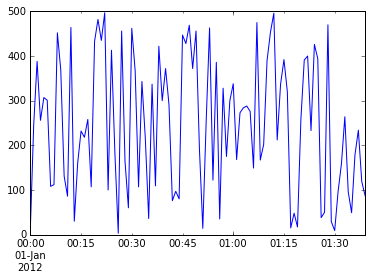

In [127]:
ts.plot()

In [128]:
ts.resample('5Min').mean()

2012-01-01 00:00:00    241.6
2012-01-01 00:05:00    268.4
2012-01-01 00:10:00    174.2
2012-01-01 00:15:00    249.6
2012-01-01 00:20:00    385.4
2012-01-01 00:25:00    173.4
2012-01-01 00:30:00    299.0
2012-01-01 00:35:00    240.8
2012-01-01 00:40:00    183.2
2012-01-01 00:45:00    434.4
2012-01-01 00:50:00    209.2
2012-01-01 00:55:00    244.8
2012-01-01 01:00:00    270.2
2012-01-01 01:05:00    253.8
2012-01-01 01:10:00    377.6
2012-01-01 01:15:00    158.4
2012-01-01 01:20:00    341.4
2012-01-01 01:25:00    196.2
2012-01-01 01:30:00    124.8
2012-01-01 01:35:00    133.6
Freq: 5T, dtype: float64

In [129]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [130]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [131]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [132]:
ts

2012-03-06   -0.265460
2012-03-07   -0.718943
2012-03-08    0.610853
2012-03-09    0.735925
2012-03-10   -1.521079
Freq: D, dtype: float64

In [133]:
ts_utc = ts.tz_localize('UTC')

In [134]:
ts_utc

2012-03-06 00:00:00+00:00   -0.265460
2012-03-07 00:00:00+00:00   -0.718943
2012-03-08 00:00:00+00:00    0.610853
2012-03-09 00:00:00+00:00    0.735925
2012-03-10 00:00:00+00:00   -1.521079
Freq: D, dtype: float64

In [135]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.265460
2012-03-06 19:00:00-05:00   -0.718943
2012-03-07 19:00:00-05:00    0.610853
2012-03-08 19:00:00-05:00    0.735925
2012-03-09 19:00:00-05:00   -1.521079
Freq: D, dtype: float64

In [136]:
ts_utc.tz_convert('Japan')

2012-03-06 09:00:00+09:00   -0.265460
2012-03-07 09:00:00+09:00   -0.718943
2012-03-08 09:00:00+09:00    0.610853
2012-03-09 09:00:00+09:00    0.735925
2012-03-10 09:00:00+09:00   -1.521079
Freq: D, dtype: float64

In [137]:
dr = pd.date_range('1/1/2012', periods=5, freq='M')

In [138]:
ts = pd.Series(np.random.randn(len(rng)), index=dr)

In [139]:
ts

2012-01-31    0.343266
2012-02-29   -0.182863
2012-03-31    0.151353
2012-04-30    2.048002
2012-05-31   -2.284168
Freq: M, dtype: float64

periodとtimestampを行ったり来たり

In [140]:
ps = ts.to_period()

In [141]:
ps

2012-01    0.343266
2012-02   -0.182863
2012-03    0.151353
2012-04    2.048002
2012-05   -2.284168
Freq: M, dtype: float64

In [142]:
ps.to_timestamp()

2012-01-01    0.343266
2012-02-01   -0.182863
2012-03-01    0.151353
2012-04-01    2.048002
2012-05-01   -2.284168
Freq: MS, dtype: float64

In [143]:
pr = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [144]:
ts = pd.Series(np.random.randn(len(pr)), pr)

In [145]:
ts.index = (pr.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [146]:
ts.head()

1990-03-01 09:00    0.813151
1990-06-01 09:00    0.089698
1990-09-01 09:00    0.277252
1990-12-01 09:00   -1.106307
1991-03-01 09:00    0.611019
Freq: H, dtype: float64

## Categoricals
- [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical)
- [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)

In [147]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [148]:
df['grade'] = df['raw_grade'].astype('category')

In [149]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [150]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [151]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [152]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [153]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

ソーティングは、文字列順ではなく、カテゴリー順でなされる

In [154]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [155]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 描画

- [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

In [156]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [157]:
ts = ts.cumsum()

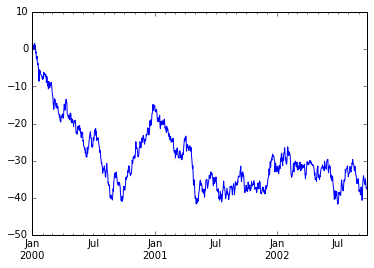

In [158]:
ts.plot()

In [159]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [160]:
df = df.cumsum()

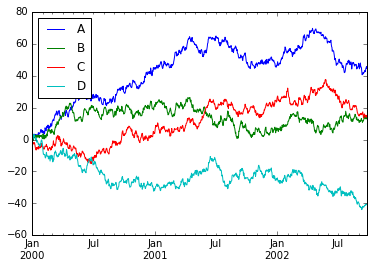

In [161]:
plt.figure(); df.plot(); plt.legend(loc='best')

## データI/O


### CSV

- [Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [162]:
df.to_csv('foo.csv')

In [163]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.807320,-0.509722,-1.496491,0.752365
1,2000-01-02,0.727399,0.489203,-2.610173,0.393244
2,2000-01-03,1.082720,-0.015574,-1.749690,0.151953
3,2000-01-04,1.693004,-0.569865,-2.537730,1.376130
4,2000-01-05,1.719984,0.368424,-2.823941,2.623776
5,2000-01-06,3.398142,1.420998,-2.580689,3.285721
6,2000-01-07,2.884844,3.021209,-1.931552,2.017458
7,2000-01-08,2.343932,2.788021,-2.492454,1.953074
8,2000-01-09,2.933297,1.189213,-3.646594,1.482867
9,2000-01-10,3.190859,2.191484,-4.701792,0.767781


In [164]:
!rm 'foo.csv'

### HDF5

- [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

In [165]:
df.to_hdf('foo.h5','df')

In [166]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.807320,-0.509722,-1.496491,0.752365
2000-01-02,0.727399,0.489203,-2.610173,0.393244
2000-01-03,1.082720,-0.015574,-1.749690,0.151953
2000-01-04,1.693004,-0.569865,-2.537730,1.376130
2000-01-05,1.719984,0.368424,-2.823941,2.623776
2000-01-06,3.398142,1.420998,-2.580689,3.285721
2000-01-07,2.884844,3.021209,-1.931552,2.017458
2000-01-08,2.343932,2.788021,-2.492454,1.953074
2000-01-09,2.933297,1.189213,-3.646594,1.482867
2000-01-10,3.190859,2.191484,-4.701792,0.767781


In [167]:
!rm 'foo.h5'

### Excel

- [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

In [168]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [169]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.807320,-0.509722,-1.496491,0.752365
2000-01-02,0.727399,0.489203,-2.610173,0.393244
2000-01-03,1.082720,-0.015574,-1.749690,0.151953
2000-01-04,1.693004,-0.569865,-2.537730,1.376130
2000-01-05,1.719984,0.368424,-2.823941,2.623776
2000-01-06,3.398142,1.420998,-2.580689,3.285721
2000-01-07,2.884844,3.021209,-1.931552,2.017458
2000-01-08,2.343932,2.788021,-2.492454,1.953074
2000-01-09,2.933297,1.189213,-3.646594,1.482867
2000-01-10,3.190859,2.191484,-4.701792,0.767781


In [170]:
!rm 'foo.xlsx'

## おまけ

以下のようなエラーがでたら次ののページを見るべし。
- [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare)
- [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas)

In [171]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().